In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline

In [3]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns
sns.set(style="white")
figure_folder = 'figures/'

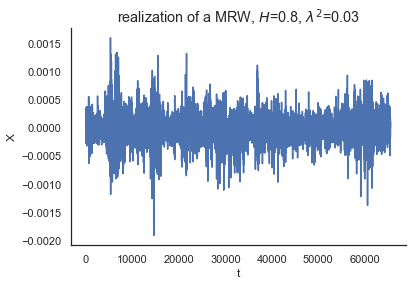

In [4]:
from pymultifracs.simul import mrw
import numpy as np

X = mrw(shape=65536, H=0.8, lam=np.sqrt(0.03), L=65536)
X = np.diff(X)

plt.plot(X)
plt.title(r'realization of a MRW, $H$=0.8, $\lambda^2$=0.03', size='large')
plt.ylabel('X')
plt.xlabel('t')
sns.despine()
plt.show()

In [5]:
from pymultifracs.wavelet import wavelet_analysis

In [34]:
WT = wavelet_analysis(X, p_exp=2, j1=2, j2=12, weighted=True, gamint=1)

In [20]:
t_index = [(10000, 20000)]

In [17]:
bad_signal = np.zeros_like(X, dtype=bool)

In [19]:
bad_signal[10000:20000] = True

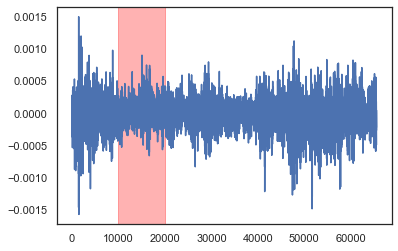

In [22]:
plt.plot(X)
for t1, t2 in t_index:
    plt.axvspan(t1, t2, color='red', alpha=.3)

In [64]:
def plot_coef(mrq, j1, j2, leader=True):
    
    if leader:
        vmax = max([np.nanmax(mrq[s]) for s in range(j1, j2+1)])
        vmin = 0
    else:
        vmin, vmax = None, None
        
    plt.figure(figsize=(20, 7))

    for i, scale in enumerate(range(j1, j2 + 1)):

        temp = mrq[scale][~np.isnan(mrq[scale])]
        
        X = (np.arange(temp.shape[0] + 1) + (3 if leader else 2)) * (2 ** (scale - j1 + 1))
        X = np.tile(X[:, None], (1, 2))

        C = temp[:, None]
        
        Y = np.ones(X.shape[0]) * scale
        Y = np.stack([Y - .5, Y + .5]).transpose()
        
        qm = plt.pcolormesh(X, Y, C, vmin=vmin, vmax=vmax, cmap='flare_r')

    plt.colorbar(qm)

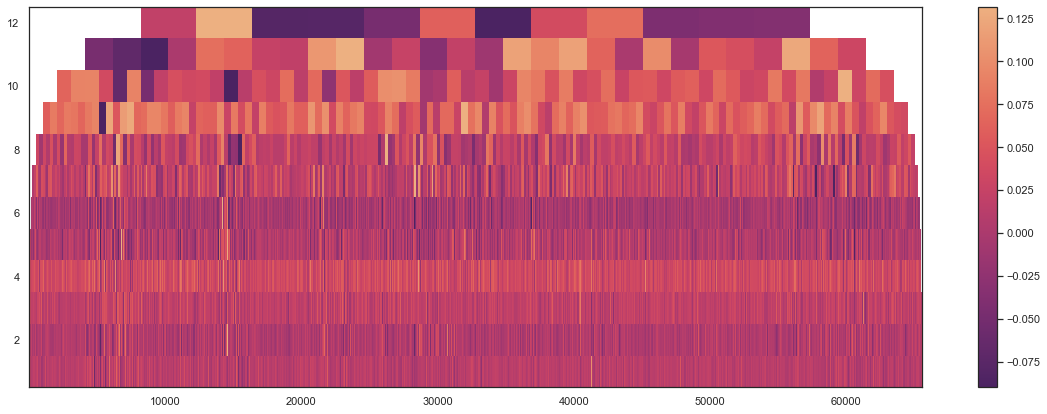

In [65]:
plot_coef(WT.wt_coefs.values, 1, 12, False)

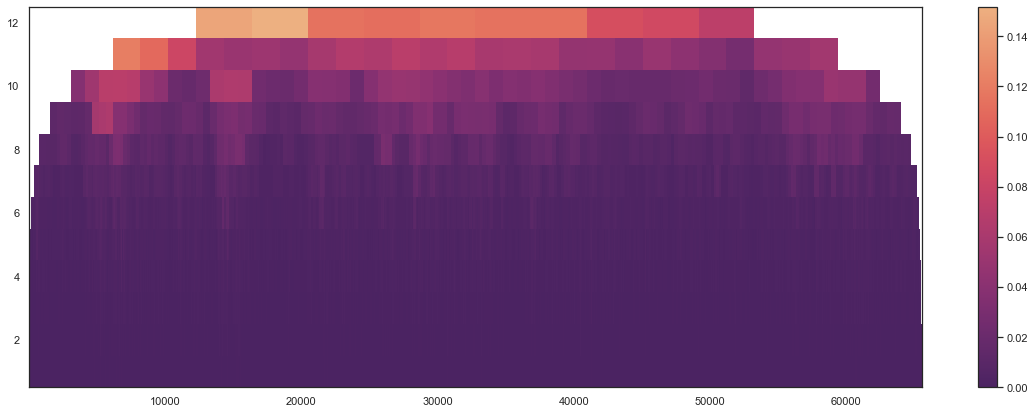

In [66]:
plot_coef(WT.wt_leaders.values, 1, 12)

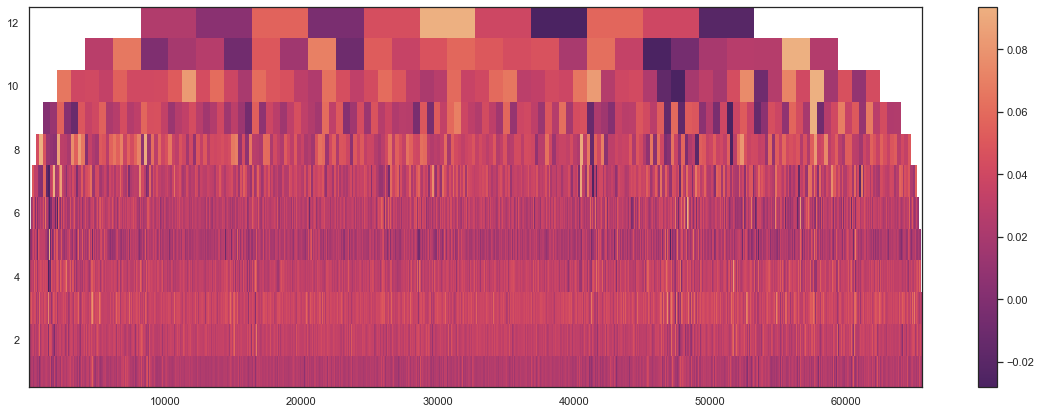

In [178]:
plot_coef(WT.wt_coefs.values, 1, 12, False)

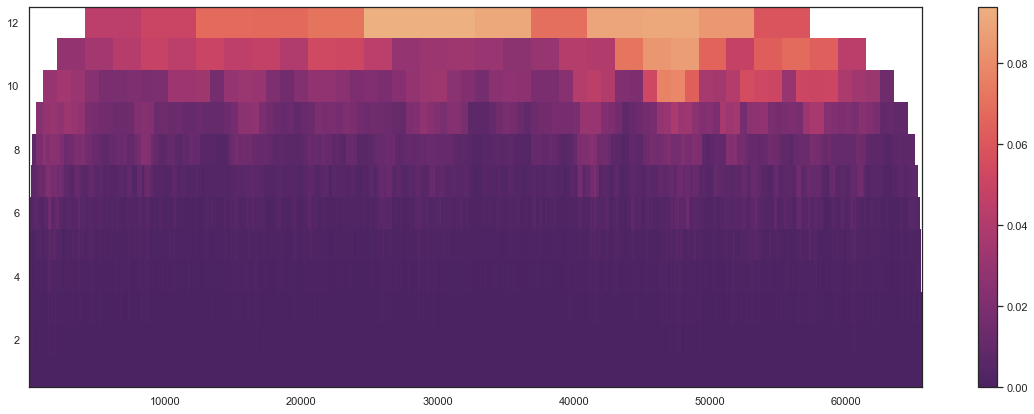

In [179]:
plot_coef(WT.wt_leaders.values, 1, 12)